# 비지도 학습

: 정해진 답, 라벨링 없이 데이터 안의 패턴을 찾아내는 것

- 유사한 데이터들을 그룹화

# K-means

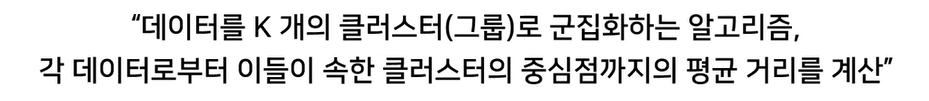

### 방법
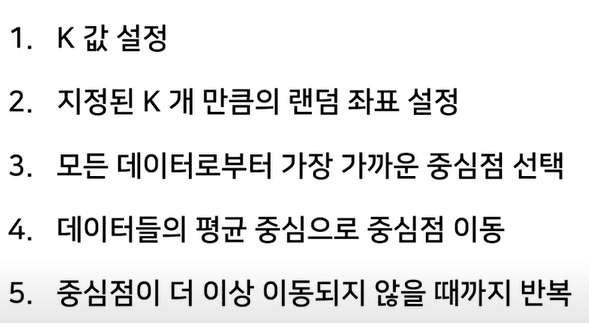

- 2번 좌표 설정은 아무거나 설정해도 됨
- 모든 데이터로부터 가까운 중심점을 찾음 = centroid라고 함
- kluster : 그룹
- 그룹을 나눈 뒤 각 그룹에서의 중심으로 2번 중심점을 움직임
- 이렇게 하고 다시 3번으로 돌아가서 중심점을 다시 찾음
- 이 과정을 중심점이 더이상 움직이지 않을 때까지 반복

### k-means의 문제

- 얘는 centroid에 매우 민감
- 랜덤 좌표 설정 -> 제약없이 랜덤으로 설정하면 값이 매번 달라짐

### 이를 해결하기 위한게 k-means++
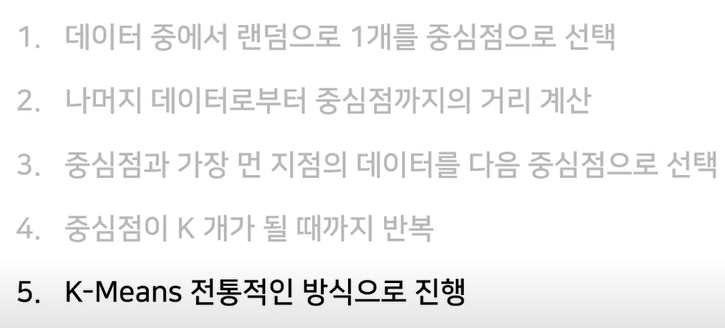

- 한개만 중심점 선택, 나머지 데이터와 거리계산
- 그리고 제일 먼 데이터가 다른 중심점이 됨
- 중심점이 k개가 될 때까지 반복
- 나머지는 k-means의 방식과 same
- 디폴트로 k-means++를 사용

# Elbow 방법

### 최적의 k개수를 찾기 위한 방법

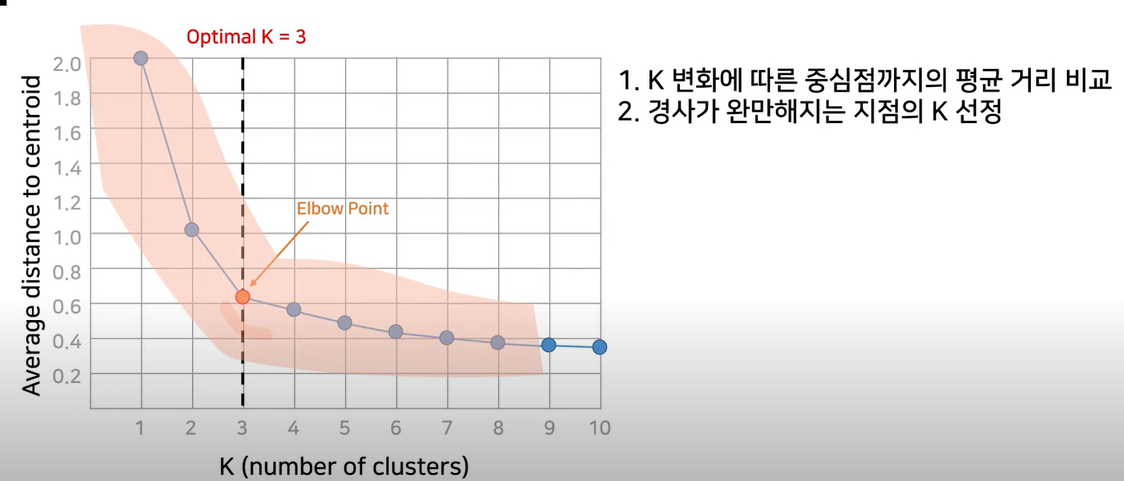

- x축은 k개수
- y축은 중심점과의 거리
- 이 곡선이 완만해지는 지점에의 k를 선택

# 유사도

### 유클리드 거리

- 우리가 흔히 하는 거리 재는 방식 점과 점 사이의 직선 거리를 찾는다 x데이터 차이의 제곱과 y데이터 차이의 제곱을 더하고 루트씌움

### 맨해튼 거리

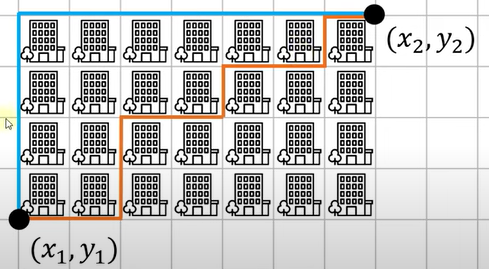
- 파란색, 주황색 직선처럼 이동
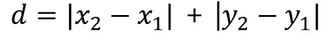

### 코사인 유사도
- 각도를 확인함
- 각도가 작을 수록 유사도가 높다
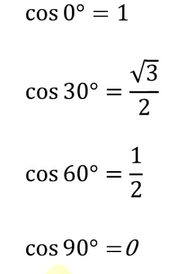



In [20]:
import os # 경고 대응
# 이거 없으면 밑에서 데이터 시각화할때 오류로 빨간색 쫙 뜸
# 넘파이 설치 전에 실행시켜주기! 아니면 계속 오류 메세지 뜸
os.environ['OMP_NUM_THREADS'] = '1'

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
dataset = pd.read_csv('KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


k-means는 비지도 학습이기 때문에 trainset을 나눌 필요가 없다

### 즉, x 값만 있으면 됨

In [14]:
X = dataset.iloc[:, :].values
# X = dataset.values 를 해도 상관 없음
# X = dataset.to_numpy() # 공식 홈페이지 권장방식, values와 같은 방식임
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화 (전체 데이터 분포 확인)

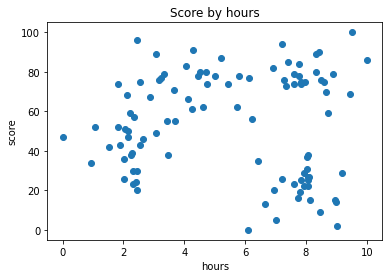

In [15]:
plt.scatter(X[:, 0], X[:, 1]) 
# x축 : hour, y축 : score
# 0번째 칼럼 = hour 1번째 칼럼 = score
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (축 범위 통일)
- x축도 100까지 늘리기
- 이렇게 하는이유는 위의 그래프에서 x축과 y축의 비율이 달라 x축에서 2 증가한게 y축에서 10증가한것보다 더 커보일 수 있다
- 왜곡과 인지능력에 문제가 생김! -> 이문제를 해결하려면?

### feature scaling을 쓰셈!

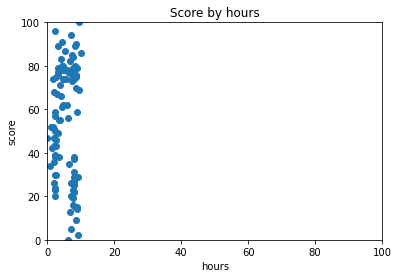

In [16]:
plt.scatter(X[:, 0], X[:, 1]) # x축 : hour, y축 : score
plt.title('Score by hours')
plt.xlabel('hours')
plt.xlim(0, 100)
plt.ylabel('score')
plt.ylim(0, 100)
plt.show()

### 피처 스케일링 (Feature Scaling)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

# 위의 array([[ 7.33, 73.  ], 처럼 컸던 데이터가 맞춰서 작아짐

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 (스케일링된 데이터)

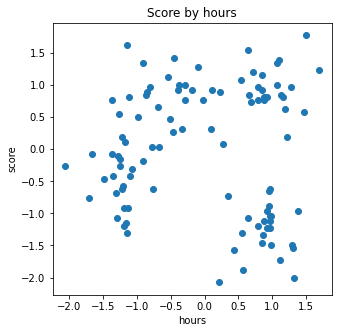

In [18]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

#범위가 x축, y축이 같아짐 (위의 그래프와 똑같으면서도!)

### 최적의 K 값 찾기 (엘보우 방식 Elbow Method)

C:\Users\hop09\Desktop\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


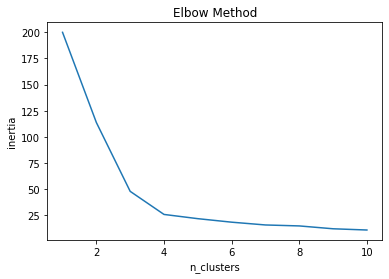

In [19]:
from sklearn.cluster import KMeans
# 반복으로 1부터 10번까지 돌려가면서 중심점 변화주기
inertia_list = []
# 거리제곱의 합을 매번 구하고 이를 따로 저장해두기 위한 빈 리스트 하나 만들어두기
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centroid) 까지의 거리의 제곱의 합
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

### 최적의 K (4) 값으로 KMeans 학습

- k가 4개다 = 클러스터가 4개다

In [22]:
K = 4 # 최적의 K 값

In [26]:
kmeans = KMeans(n_clusters=K, random_state=0)
# k-means++는 디폴트라 굳이 적어주지 않아도 됨
# kmeans.fit(X)을 하지 않는 이유는 각 지점들이 어떤 클러스터에 속하는지 알아보기 위해서임
y_kmeans = kmeans.fit_predict(X)


In [27]:
#K가 4개니까 0-3에 해당하는 값들을 가져옴
y_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

### 데이터 시각화 (최적의 K)

In [30]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점 (centroid) 좌표
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

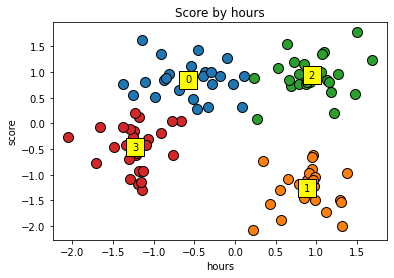

In [31]:
for cluster in range(K): # 0-3까지 4번반복한다
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, edgecolor='black') # 각 데이터
# 처음에 y_kmeans == cluster하면 0이 됨 (0부터 반복이니까), []안에 조건 적고 y_kmeans가 0인 애들의 인덱스를 받아옴
# ==cluster 뒤의 ,0은 데이터셋에서 봤던 hour 의 정보임 (칼럼인덱스 0)
# y축에 들어갈 데이터는 칼럼인덱스값이 1 인애들로 불러오기
# s 는 사이즈 정보 클수록 사이즈가 크다
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 중심점 네모
#클러스터 좌표(각 클러스터의 center좌표가져오기 -> 위의 array값들을 가져오기)
#노란색 박스를 만드는 작업
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center', ha='center') # 클러스터 텍스트 출력
# 노란색 박스 안에 각 클러스터의 숫자를 적어주는 작업
# for cluster로 k의 값들(0 1 2 3)을 지정했으므로 cluster적어주기
# va와 ha로 수평, 수직 위치를 center로 가운데로 맞춰준다
    
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 근데 이렇게 하면 원래값이 뭐였는지 알 수 없다

- 다시 돌려주는 작업 필요!

### 데이터 시각화 (스케일링 원복)

- import했던 StandardScaler의 inverse_transform()이라는 함수를 사용

In [32]:
X_org = sc.inverse_transform(X) # Feature Scaling 된 데이터를 다시 원복
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [33]:
# 중심점들도 다시 원복
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

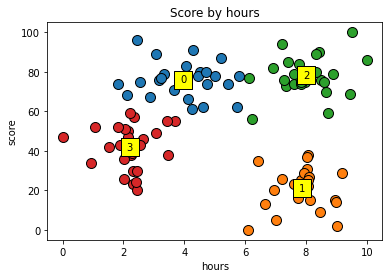

In [34]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s=100, edgecolor='black') # 각 데이터
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 중심점 네모
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va='center', ha='center') # 클러스터 텍스트 출력
    
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

- 0번째 클러스터: 공부시간은 적은데 성적은잘나옴(천재)
- 1번째 클러스터 : 공부시간은 많은데 성적은 안나옴(안타까움)
- 2번째 클러스터 : 공부시간도 많고 성적도 잘나옴(노력형)
- 3번째 클러스터 : 공부도 안하고 성적도 안나옴